In [7]:
!pip install spacy
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 54.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import re

nlp = spacy.load("pt_core_news_sm")

df = pd.read_csv('/content/df_exportacao_importacao_classificado.csv')
corpus = df['Produto_Setor'].astype(str).tolist()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-záéíóúàèìòùâêîôûãõç\s]', '', text)
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

corpus_clean = [preprocess_text(doc) for doc in corpus]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus_clean)

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df.head())

# Termos mais relevantes
sum_tfidf = tfidf_df.sum().sort_values(ascending=False)
print(sum_tfidf.head(10))


   agrícola  alimento  automotivo  aço  circuito  combustível  componente  \
0  0.000000       0.0         0.0  0.0       0.0      0.00000         0.0   
1  0.861397       0.0         0.0  0.0       0.0      0.00000         0.0   
2  0.000000       1.0         0.0  0.0       0.0      0.00000         0.0   
3  0.000000       0.0         0.0  0.0       0.0      0.57866         0.0   
4  0.000000       0.0         0.0  0.0       0.0      1.00000         0.0   

   dado  eletrônico  equipamento  ...  mineração  máquina  processamento  \
0   0.0         0.0          0.0  ...   0.000000      0.0            0.0   
1   0.0         0.0          0.0  ...   0.000000      0.0            0.0   
2   0.0         0.0          0.0  ...   0.000000      0.0            0.0   
3   0.0         0.0          0.0  ...   0.702529      0.0            0.0   
4   0.0         0.0          0.0  ...   0.000000      0.0            0.0   

    produto  químico  telecomunicação     total  transporte  têxtel  vestuário  

/tmp/ipython-input-2-596170357.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms.values, y=top_terms.index, palette='viridis')


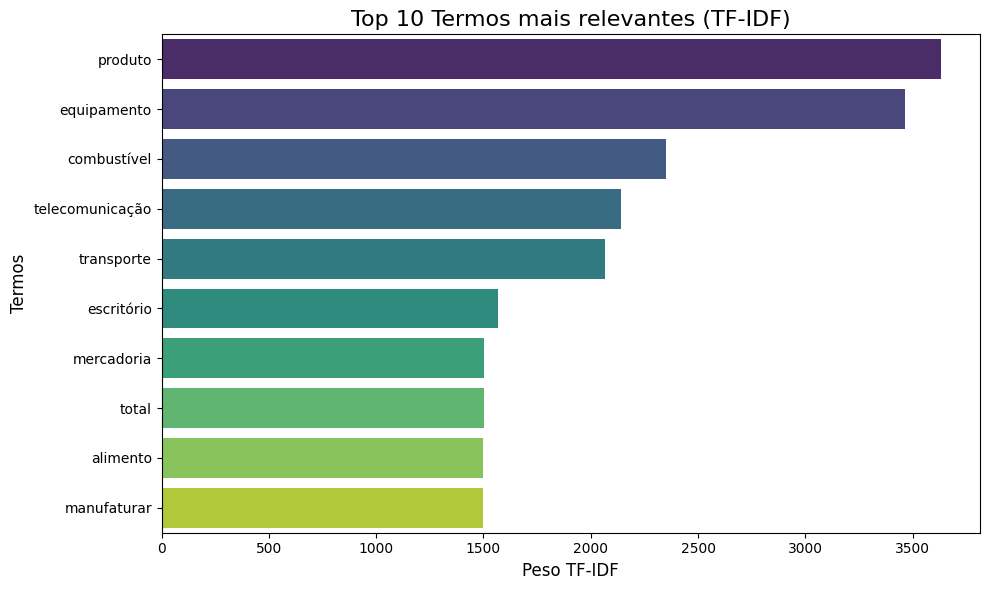

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleciona os 10 termos mais relevantes
top_terms = sum_tfidf.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_terms.values, y=top_terms.index, palette='viridis')
plt.title('Top 10 Termos mais relevantes (TF-IDF)', fontsize=16)
plt.xlabel('Peso TF-IDF', fontsize=12)
plt.ylabel('Termos', fontsize=12)
plt.tight_layout()
plt.show()


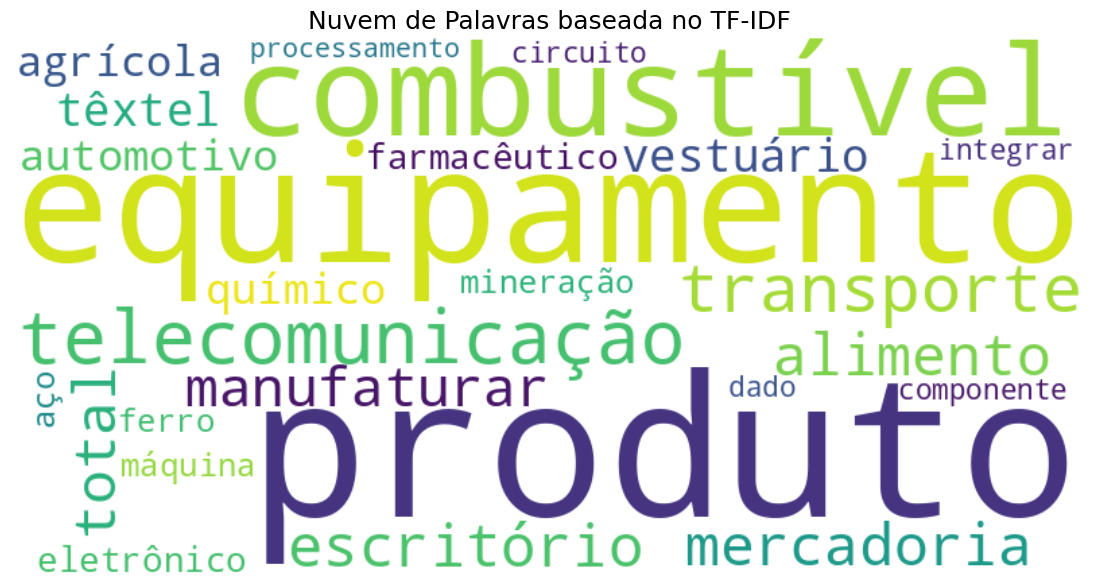

In [3]:
from wordcloud import WordCloud

# Gera a nuvem de palavras baseada nos pesos TF-IDF
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis').generate_from_frequencies(sum_tfidf)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras baseada no TF-IDF', fontsize=18)
plt.show()
